# 강의 01-2. OpenCV 개요-2(필터, 기능 감지)

### 내용물 :

    1. 강의 01 개요 
       1.1. 라이브러리 가져오기 및 변수 할당
    2. 커널(2D 필터)이란 무엇입니까? 
       2.1. 저역 통과 필터 
       2.2. 고역 통과 필터 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.2.1. 라플라시안 필터 <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.2.2. 프리윗 필터 <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.2.3. 수평 프리윗 필터 <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.2.4. 수직 프리윗 필터

    3. 특징 감지 <br>
       3.1. 기능이란 무엇입니까? <br>
       3.2. 기능 일치 <br>
       3.3. ORB
  

# 1. 강의 01 개요

이 강의는 OpenCV를 사용하여 Filters와 Feature Detection을 탐구하는 것을 목표로 합니다.<br>
의도한 학습 결과는 다음과 같습니다.<br>
* 커널과 필터에 대한 기본적인 이해와 사용법
* Feature Detection에 대한 기본 이해

## 1.1 라이브러리 가져오기 및 변수 할당

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# QUIZ: Assign "bear.jpg" to the img variable using the materials from the previous lecture, and resize the image to (512,512).
img = cv2.imread("./images/bear.jpg")
img = cv2.resize(img,(512,512))

# OpenCV uses BGR (Blue Green Red) while matplotlib uses RGB (Red Green Blue). Therefore, the channels will be back to front when the OpenCV image is loaded using matplotlib. Therefore, reverse the channel explicitly to maintain original color.
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# QUIZ: Convert the image to Grayscale and assign it to the img_gray variable.
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 2. 커널(2D 필터)이란 무엇입니까?

커널, 컨볼루션 행렬 또는 마스크는 이미지에 흐림, 선명하게 하기, 엠보싱 및 가장자리 감지와 같은 효과를 부여하는 행렬입니다. 이것은 커널과 이미지 사이에 컨볼루션을 수행하여 수행됩니다.

한편, 필터라는 용어는 여러 개의 커널이 적층된 3차원 구조를 의미한다. 2D 필터의 경우 필터는 커널과 동일합니다. 즉, 2D 필터, 즉 커널은 컨볼루션을 통해 이미지의 속성을 변경하여 사용자의 목적에 맞는 이미지를 생성하는 데 목적이 있습니다.

필터는 일상 생활에서 매우 자주 사용됩니다. 예를 들어 줌(Zoom)과 같은 화상회의 플랫폼에서는 사용자의 배경을 흐리게 할 수 있는데, 이는 블러(Blur) 필터를 사용한 예이다. 아래 이미지에 다양한 필터를 적용해 보도록 하겠습니다.

<p align="center">
  <img src='./images/bear.jpg' 너비=500 />
</p>

## 2.1 저역 통과 필터

저역 통과 필터는 흐릿한 필터 또는 스무딩이라고도 하며 이미지를 흐리게 하는 효과가 있습니다. 수학적으로 필터에 있는 모든 값의 합은 항상 1입니다.

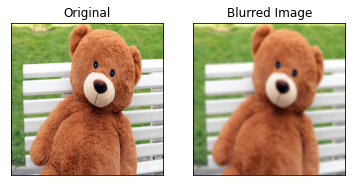

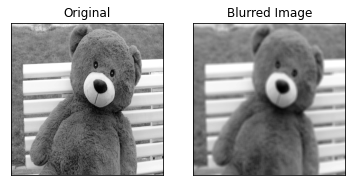

In [19]:
# Blurry Filter, or Low Pass Filter 
# kernel = np.array([[1, 1, 1, 1, 1],
#                   [1, 1, 1, 1, 1],
#                   [1, 1, 1, 1, 1],
#                   [1, 1, 1, 1, 1],
#                   [1, 1, 1, 1, 1]])/25
# kernel = np.ones((5,5))/25
kernel = np.ones((10,10))/100

# Convolving the kernels to the image
dst = cv2.filter2D(img,-1,kernel) 
dst_gray = cv2.filter2D(img_gray,-1,kernel)
 
# Visualizing the original and the blurred image
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Blurred Image')
plt.xticks([]), plt.yticks([])
plt.show()

# Visualizing the grayscale verions of the original and the blurred image
plt.subplot(121),plt.imshow(img_gray,cmap="gray"),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst_gray,cmap="gray"),plt.title('Blurred Image')
plt.xticks([]), plt.yticks([])
plt.show()


## 2.2 하이패스 필터

저역 통과 필터와 달리 고역 통과 필터는 이미지의 가장자리를 감지합니다. 가장자리의 기울기를 증폭하여 이미지를 전체적으로 선명하게 만듭니다.

### 2.2.1 라플라시안 필터

<p align="center">
   <img src='./images/laplacian.jpg' />
</p>

라플라시안 필터는 고역 통과 필터의 한 예이며 수평 및 수직의 모든 방향에서 에지를 감지합니다. Laplacian 필터는 Laplacian 함수를 이용한 필터이며, 함수는 위 그림과 같이 시각화된다.

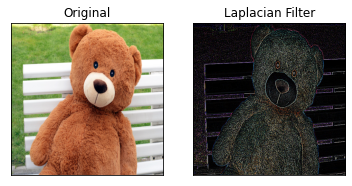

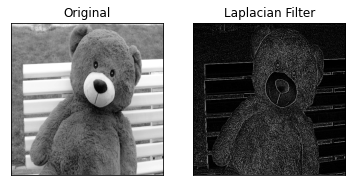

In [23]:
# Amongst the filters below, try to find the most suitable one for our specific case

# 3x3 Negative Laplacian Operator - amplifies the inner edges of the image
# kernel = np.array([ [0,-1,0],
#                     [-1,4,-1],
#                     [0,-1,0]])

# 3x3 Positive Laplacian Operator - amplifies the outer edges of the image
# kernel = np.array([ [0,1,0],
#                     [1,-4,1],
#                     [0,1,0]])

# 3x3 Negative Discrete Laplacian Operator - the output is clearer than the kernels above
# kernel = np.array([ [-1,-1,-1],
#                     [-1,8,-1],
#                     [-1,-1,-1]])

# 3x3 Positive Discrete Laplacian Operator different version - the output is the clearest amongst the above kernels
kernel = np.array([ [1,1,1],
                    [1,-8,1],
                    [1,1,1]])

################################################################################################

# Visualizing the original and the filtered image
dst = cv2.filter2D(img,-1,kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Laplacian Filter')
plt.xticks([]), plt.yticks([])
plt.show()

# Visualizing the grayscale versions of the original and the filtered image
dst_gray = cv2.filter2D(img_gray,-1,kernel)
plt.subplot(121),plt.imshow(img_gray,cmap="gray"),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst_gray,cmap="gray"),plt.title('Laplacian Filter')
plt.xticks([]), plt.yticks([])
plt.show()

### 2.2.2 프리윗 필터

Laplacian Filter가 방향에 관계없이 모든 edge를 검출하는 filter라면 Prewitt filter는 세로와 가로 방향의 edge를 따로 검출하는 filter이다. 아래의 수평 및 수직 프리윗 필터를 참조하십시오.

<p align="center">
   <img src='./images/prewitt.jpg' />
</p>

### 2.2.3 수평 프리윗 필터

Horizontal Prewitt Filter는 Vertical Prewitt Operator(Gx)를 사용하여 출력 이미지의 수직 가장자리를 감지하고 표시합니다.

In [24]:
image =  np.array([ [0,0,0],
                    [0,0,0],
                    [255,255,255]])
kernel = np.array([ [-1,0,1],
                    [-1,0,1],
                    [-1,0,1]])
np.sum(image*kernel)

0

In [26]:
image =  np.array([ [255,0,0],
                    [255,0,0],
                    [255,0,0]])
kernel = np.array([ [-1,0,1],
                    [-1,0,1],
                    [-1,0,1]])
np.abs(np.sum(image*kernel))

765

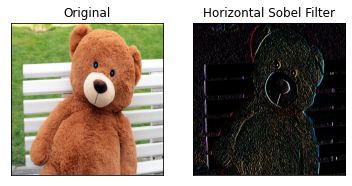

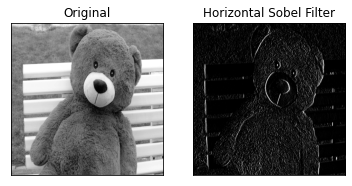

In [27]:
# Horizontal Filter (Gx)
kernel = np.array([ [-1,0,1],
                    [-1,0,1],
                    [-1,0,1]])

################################################################################################

# Visualizing the original and the filtered image
dst = cv2.filter2D(img,-1,kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Horizontal Sobel Filter')
plt.xticks([]), plt.yticks([])
plt.show()

# Visualizing the grayscale versions of the original and the filtered image
dst_gray = cv2.filter2D(img_gray,-1,kernel)
plt.subplot(121),plt.imshow(img_gray,cmap="gray"),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst_gray,cmap="gray"),plt.title('Horizontal Sobel Filter')
plt.xticks([]), plt.yticks([])
plt.show()

### 2.2.4 수직 프리윗 필터

유사하게, Vertical Prewitt Filter는 Horizontal Prewitt Operator(Gy)를 사용하여 출력 이미지의 수평 가장자리를 감지하고 표시합니다.

In [28]:
image =  np.array([ [0,0,0],
                    [0,0,0],
                    [255,255,255]])
kernel = np.array([ [1,1,1],
                    [0,0,0],
                    [-1,-1,-1]])
np.abs(np.sum(image*kernel))

765

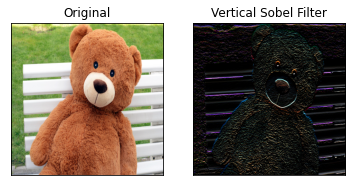

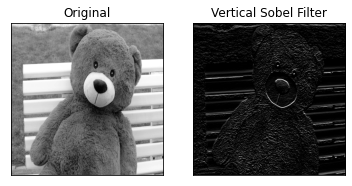

In [29]:
# Vertical Filter (Gy)
kernel = np.array([ [1,1,1],
                    [0,0,0],
                    [-1,-1,-1]])

################################################################################################

# Visualizing the original and the filtered image
dst = cv2.filter2D(img,-1,kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Vertical Sobel Filter')
plt.xticks([]), plt.yticks([])
plt.show()

# Visualizing the grayscale versions of the original and the filtered image
dst_gray = cv2.filter2D(img_gray,-1,kernel)
plt.subplot(121),plt.imshow(img_gray,cmap="gray"),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst_gray,cmap="gray"),plt.title('Vertical Sobel Filter')
plt.xticks([]), plt.yticks([])
plt.show()

지금까지 OpenCV를 사용하여 이미지에 필터를 적용하여 새 이미지를 만들었습니다.

실제로 OpenCV를 사용하여 이미지 필터링 외에 다양한 작업을 수행할 수 있습니다. 그 중 하나는 특징 감지입니다. 다음 교육 세션에서는 딥 러닝을 도입하기 전에 OpenCV 라이브러리만으로 기능 감지를 수행하는 방법을 살펴보겠습니다.

# 3. 특징 감지


## 3.1 기능이란 무엇입니까?

특징은 이미지의 모서리나 꼭짓점과 같이 이미지의 특징적인 정보입니다. 이미지의 고유한 특징을 Feature Points 또는 Interest Points라고 하며 밝기, 회전, 배율의 변화와 같은 다양한 이미지 변형 과정에서 안정적으로 추출할 수 있는 이미지의 포인트입니다.


<p align="center">
   <img src='./images/featuredetection.jpg' />
</p>

## 3.2  특징 매칭

Feature Matching은 동일한 객체의 두 이미지 사이에 대응 관계를 설정하는 프로세스입니다. 밝기, 회전 또는 배율의 변화에 관계없이 동일한 개체가 두 이미지 사이에서 동일한 특징으로 일치될 수 있습니다.

<p align="center">
   <img src='./images/featuremapping.jpg' />
</p>

## 3.3 ORB

특징 탐지를 허용하는 알고리즘 중에는 SIFT, SURF 및 ORB가 있습니다. ORB는 다양한 방향과 배율에서 가장 잘 작동하기 때문에 구체적으로 살펴보겠습니다.

ORB 연산은 먼저 이미지의 각 픽셀과 주변 픽셀의 강도를 비교한 후 일정 한계를 초과하면 해당 픽셀을 키포인트로 지정하는 방식으로 수행된다. 키포인트가 감지되면 각 키포인트에 대해 고유한 특징이 생성되고 동일한 객체의 서로 다른 이미지 간에 특징이 일치됩니다.

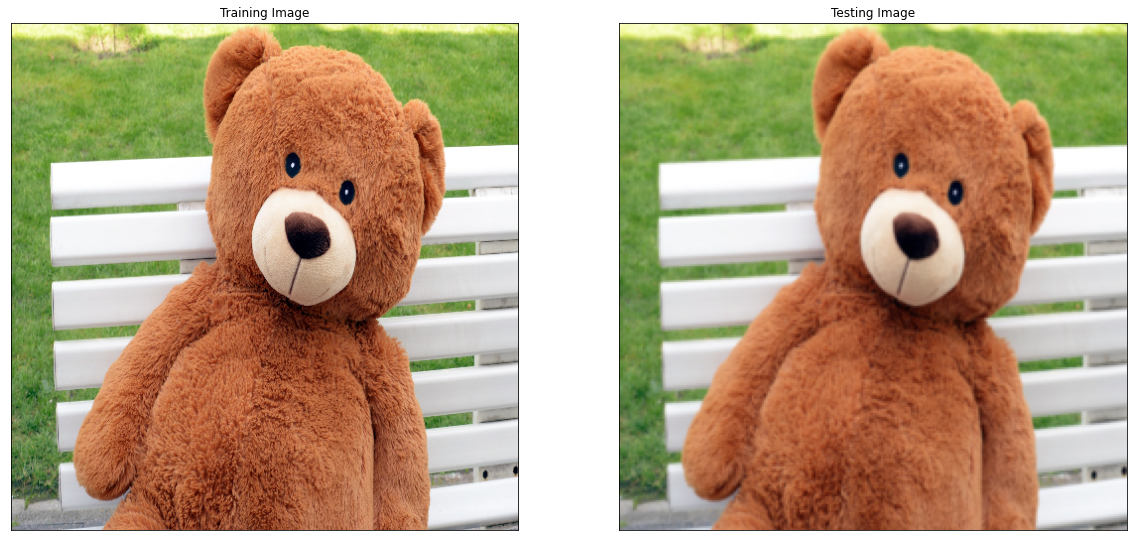

In [34]:
img = cv2.imread("./images/bear.jpg")
img = cv2.resize(img,(512,512))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

test_image = cv2.pyrDown(img)
fx, plots = plt.subplots(1, 2, figsize=(20,10))
plt.subplot(121),plt.imshow(img),plt.title('Training Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(test_image),plt.title('Testing Image')
plt.xticks([]), plt.yticks([])
plt.show()

[[  0.8660254    0.5        -46.85125168]
 [ -0.5          0.8660254   81.14874832]]


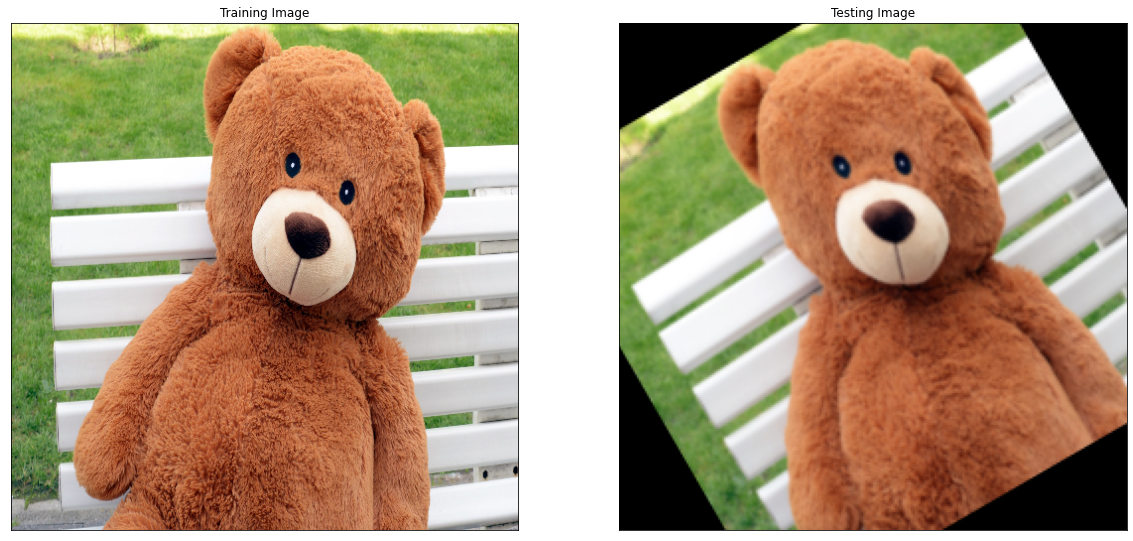

In [36]:
# Gaussian Pyramid to change the image scale
test_image = cv2.pyrDown(img)
# test_image = cv2.pyrDown(test_image)

# Rotating the image
num_rows, num_cols = test_image.shape[:2]
rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)
print(rotation_matrix)
test_image = cv2.warpAffine(test_image, rotation_matrix, (num_cols, num_rows))

# Visualizing the image
fx, plots = plt.subplots(1, 2, figsize=(20,10))
plt.subplot(121),plt.imshow(img),plt.title('Training Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(test_image),plt.title('Testing Image')
plt.xticks([]), plt.yticks([])
plt.show()


500
['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'angle', 'class_id', 'convert', 'octave', 'overlap', 'pt', 'response', 'size']
(41.0, 263.0)
(500, 32)


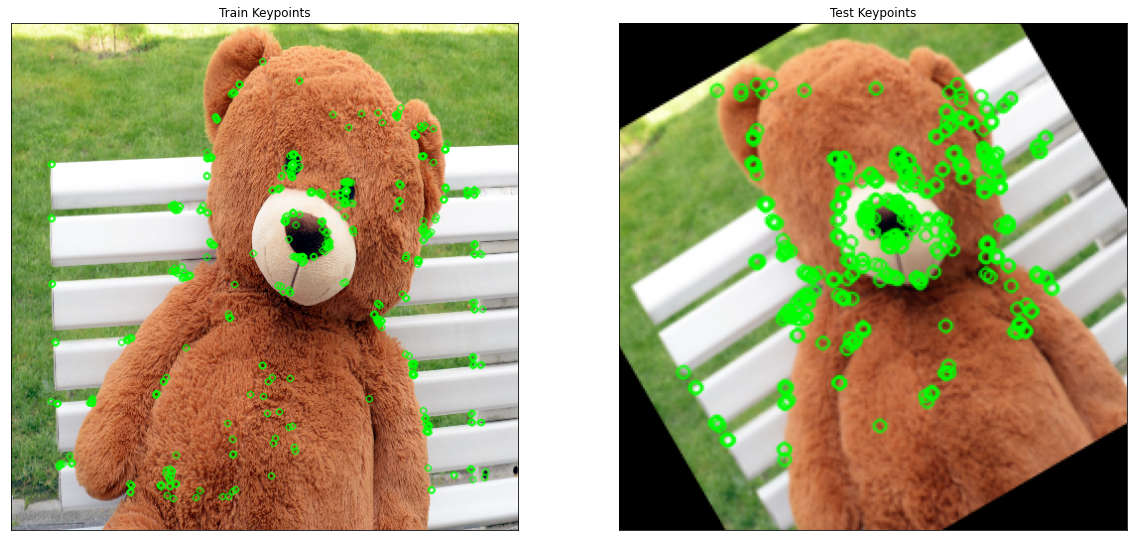

In [44]:
# Executing the OpenCV ORB algorithm to extract Keypoints
orb = cv2.ORB_create()
train_keypoints, train_descriptor = orb.detectAndCompute(img, None)
print(len(train_keypoints))
print(dir(train_keypoints[0]))
print(train_keypoints[0].pt)
print(train_descriptor.shape)
test_keypoints, test_descriptor = orb.detectAndCompute(test_image, None)
keypoints_train = np.copy(img)
keypoints_test = np.copy(test_image)
cv2.drawKeypoints(img, train_keypoints, keypoints_train, color = (0, 255, 0))
cv2.drawKeypoints(test_image, test_keypoints, keypoints_test, color = (0, 255, 0))

# Visualizing Keypoints
fx, plots = plt.subplots(1, 2, figsize=(20,10))
plt.subplot(121),plt.imshow(keypoints_train),plt.title('Train Keypoints')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(keypoints_test),plt.title('Test Keypoints')
plt.xticks([]), plt.yticks([])
plt.show()

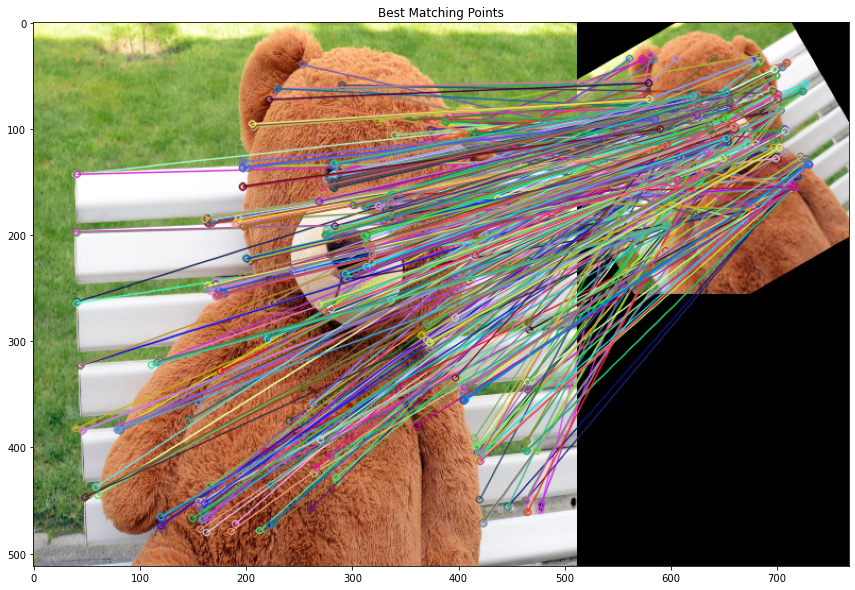

In [45]:
# Initialize a Brute Force Matcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING)

# Feature matching between the ORB descriptor of the training image and the test image
matches = bf.match(train_descriptor, test_descriptor)
result = cv2.drawMatches(img, train_keypoints, test_image, test_keypoints, matches, None, flags=2)

# Visualizing the matching points
plt.figure(figsize=(20,10))
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()